## EE-361M Introduction to Data Mining
## Assignment #4
## Due: Thursday, Mar 24, 2016 by 2pm; Total points: 50


Your homework should be written in a **Jupyter notebook** (if this isn't possible, let me know). Please use this naming format for your notebook you submit: **Group(Group Num)_HW(HW Number).ipynb**. For example, Group1_HW1.ipynb. Homeworks should be submitted through Canvas in your **groups of 3 from the first homework**. If groups need to be adjusted please contact the TA. Also, please make sure your code runs and the graphics (and anything else) are displayed in your notebook before submitting.

# Question 1 (1+2+1+2+3+3+3=15 points)- Decision Trees 

For this question, we will be using the housing dataset. To make our lives easier, we will be using the pydataset package, which can be installed with 'pip install pydataset'. Pydataset allows us to easily access a lot of datasets. The data can then be accessed as a pandas dataframe as 'df = data('Housing'). See code below.

1. Create price_01 as 1 when price > than the median price and zero otherwise. This will be the class we are now trying to predict.
1. Convert driveway, recroom, fullbase, gashw, airco, and prefarea to numeric dummy variables (1 for yes, zero for no)
2. Split the data into training and testing with a random seed of 42 and keeping 1/3rd of the data for testing
2. Fit a [decision tree classifier](http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier) to predict price_01 using bedrooms, bathrms, and fullbase on the training data.
4. Use [export_graphviz](http://scikit-learn.org/stable/modules/generated/sklearn.tree.export_graphviz.html) to visualize the tree. Embed the visualization in your notebook. Comment on the tree - what variables are important? What sequence of decisions (splits) leads to the most likey to get a price_01 of 1 and 0? This problem will require installing [graph viz](http://www.graphviz.org/Download..php).
5. Plot the ROC curve and display the area under the curve score on the test data. For the ROC curve and AUC you will need to get the predicted probabilities (rather than predicting just the class label) using predict_proba() instead of predict().
6. How can decision trees protect against overfitting? And how does the tree decide on a splitting point?

In [1]:
# install pydataset to get the data (uncomment out next line to do this)
# !pip install pydataset

In [3]:
from pydataset import data
df = data('Housing')
df.head()

,price,lotsize,bedrooms,bathrms,stories,driveway,recroom,fullbase,gashw,airco,garagepl,prefarea
1,42000,5850,3,1,2,yes,no,yes,no,no,1,no
2,38500,4000,2,1,1,yes,no,no,no,no,0,no
3,49500,3060,3,1,1,yes,no,no,no,no,0,no
4,60500,6650,3,1,2,yes,yes,no,no,no,0,no
5,61000,6360,2,1,1,yes,no,no,no,no,0,no


# Answer
## 1 & 2

In [5]:
import pandas as pd
from sklearn.cross_validation import train_test_split
import numpy as np
df['price_01'] = df.price > df.price.median()
df_dummies = pd.get_dummies(df)

## 3 & 4

In [11]:
from sklearn.tree import DecisionTreeClassifier
features = ['bedrooms', 'bathrms', 'fullbase_yes']
X = df_dummies[features].values
y = df_dummies['price_01'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            random_state=None, splitter='best')

## 5

In [12]:
from sklearn.tree import export_graphviz
export_graphviz(clf, out_file='tree.dot', feature_names=features)   

In [13]:
!dot -Tpng tree.dot -o tree.png

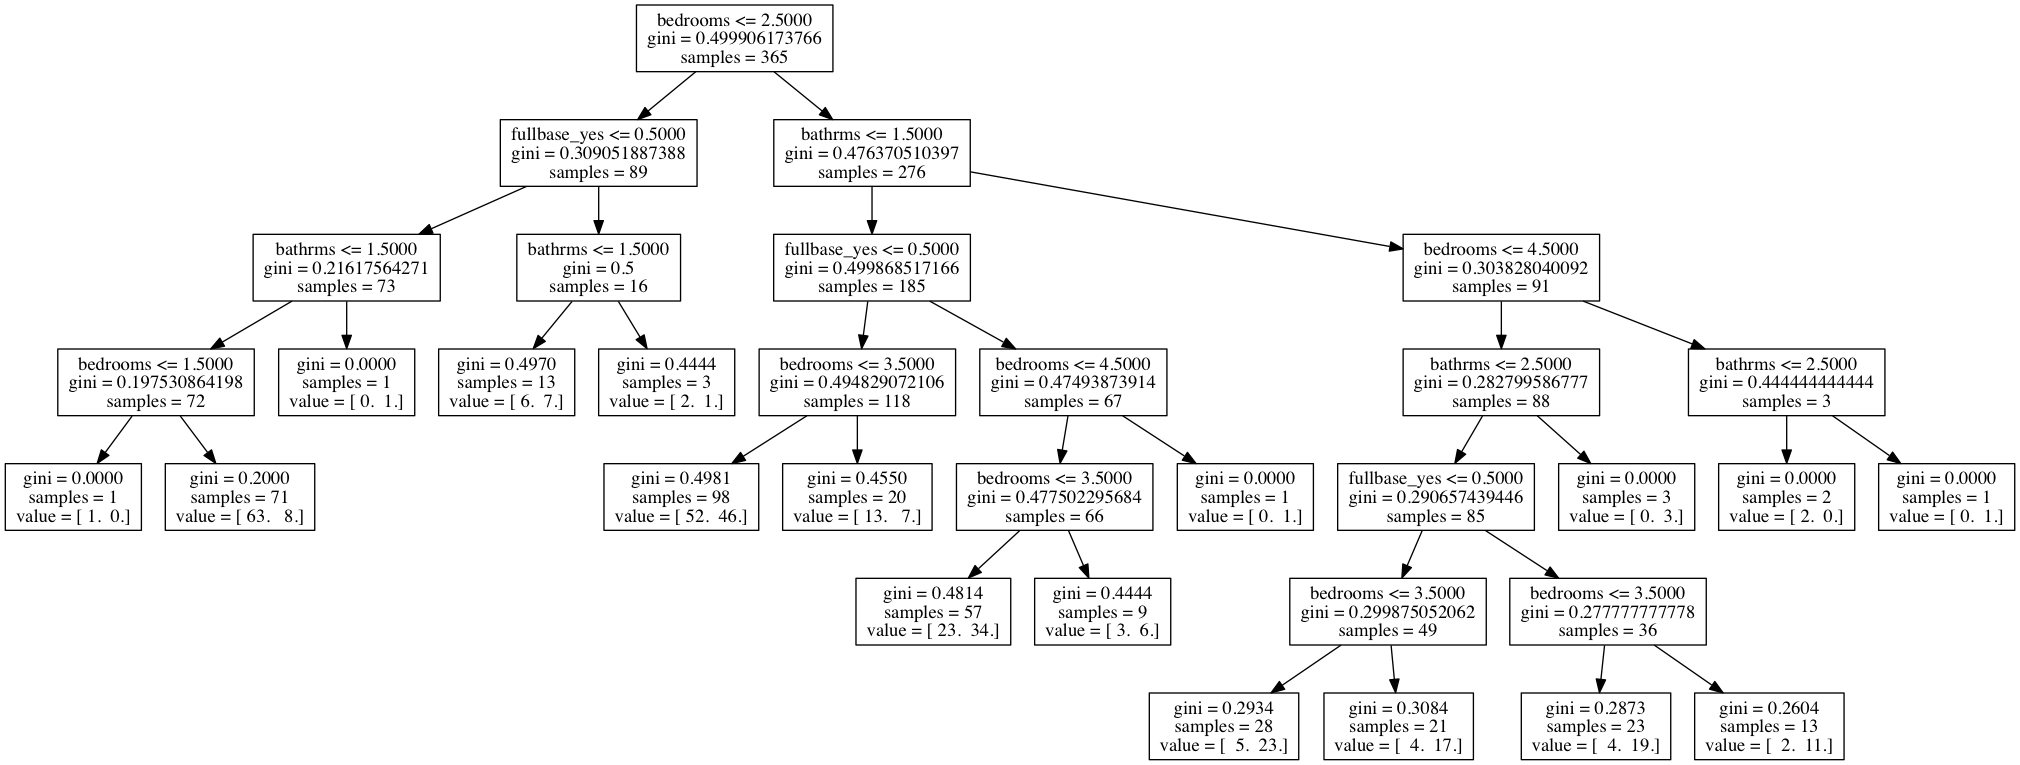

In [14]:
from IPython.display import Image
Image(filename='tree.png') 

## 6

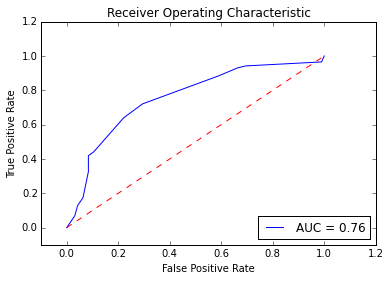

In [18]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
%matplotlib inline
def plot_roc(model):
    model.fit(X_train, y_train)
    predictions = model.predict_proba(X_test)
    predictions = [x[1] for x in predictions]
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, predictions)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    plt.title('Receiver Operating Characteristic')
    plt.plot(false_positive_rate, true_positive_rate, 'b',
    label='AUC = %0.2f'% roc_auc)
    plt.legend(loc='lower right')
    plt.plot([0,1],[0,1],'r--')
    plt.xlim([-0.1,1.2])
    plt.ylim([-0.1,1.2])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
plot_roc(DecisionTreeClassifier())

## 7

Tree pruning can help with overfitting - see p.307 of introduction to statistical learning. 

Gini index or cross-entropy can be used to decide on splitting point - see p.311 of introduction to statistical learning.

# Question 2 (5+5=10 points)- Bayes Decision Rule

1. Suppose points in $\mathbb{R}^2$ are being obtained 
from two classes, C1 and C2, both of which are normally distributed with means at 
(2,0) and (0,2) respectively.  The covariance matrix for both classes is the (2x2) identity matrix.
If the priors of C1 and C2 are 1/5 and 4/5 respectively, what is the 
ideal (i.e. Bayes Optimal) decision boundary (derive the equation for this boundary)?
2. Suppose the cost of misclassifying an input actually belonging to C1 is 
twice as  expensive as  misclassifying
an input belonging to C2. Correct classification does not incur any cost.
If the objective is to minimize the expected cost rather than
expected misclassification rate, what would be the best decision boundary?
(obtain the equation that describes this boundary).

# ANSWER

1. We are given that points $\mathbf{x} = (x, y) \in \mathbb{R}^{2}$ are being obtained from two classes, $C_{1}$ and $C_{2}$, both of which are normally distributed with means $(2, 0)$ and $(0, 2)$ respectively with the covariance matrix for both classes being the $2 \times 2$ identity matrix. Also, the priors $p(C_{1})$ and $p(C_{2})$ are $\frac{1}{5}$ and $\frac{4}{5}$ respectively. Thus, the Bayes optimal decision boundary will be given by
\begin{align*}
&p(\mathbf{x}, C_{1}) = p(\mathbf{x}, C_{2}),\\
\Longrightarrow \; &p(\mathbf{x} \vert C_{1}) \, p(C_{1}) = p(\mathbf{x} \vert C_{2}) \, p(C_{2}),\\
\Longrightarrow \; &\frac{1}{5} \frac{1}{2 \pi} e^{-\frac{1}{2}[(x - 2)^{2} + y^{2}]} = \frac{4}{5} \frac{1}{2 \pi} e^{-\frac{1}{2}[x^{2} + (y - 2)^{2}]},\\
\Longrightarrow \; &-\frac{1}{2}[(x - 2)^{2} + y^{2}] = -\frac{1}{2}[x^{2} + (y - 2)^{2}] + \log 4,\\
\Longrightarrow \; &y = x - \log 2.
\end{align*}
2. If the cost of misclassifying an input actually belonging to $C_{1}$ is twice as much as that of misclassifying an input actually belonging to $C_{2}$, then the decision boundary that minimizes the exptected cost will be given by
\begin{align*}
&2 \, p(\mathbf{x}, C_{1}) = p(\mathbf{x}, C_{2}),\\
\Longrightarrow \; &2 \, p(\mathbf{x} \vert C_{1}) \, p(C_{1}) = p(\mathbf{x} \vert C_{2}) \, p(C_{2}),\\
\Longrightarrow \; &\frac{2}{5} \frac{1}{2 \pi} e^{-\frac{1}{2}[(x - 2)^{2} + y^{2}]} = \frac{4}{5} \frac{1}{2 \pi} e^{-\frac{1}{2}[x^{2} + (y - 2)^{2}]},\\
\Longrightarrow \; &-[(x - 2)^{2} + y^{2}] = -[x^{2} + (y - 2)^{2}] + \log 2,\\
\Longrightarrow \; &y = x - \frac{\log 2}{2}.
\end{align*}


# Question 3 (1+3+1+3+2+2+3=15 points) - Naive Bayes, LDA & QDA

For this problem, we will be using the California School dataset, which can be imported using pydataset (See code below).

1. Create a binary variable, test_score_01, that contains a 1 if testscr contains a value above its median, and a 0 otherwise.
2. Explore the data graphically in order to investigate the association between test_score_01 and the other features. Which of the other features seem most likely to be useful in predicting total_score_01? Scatterplots and boxplots may be useful tools to answer this question. Describe your findings.
3. Split the data into training and testing with random state of 42 and keeping 1/3rd of the data for testing. X should include ['enrltot', 'teachers', 'calwpct', 'mealpct', 'computer', 'avginc'] as fectures. Your dependent variable, y, is test_score_01.
4. Perform Naive Bayes on the training data. Plot the ROC curve and display the area under the curve score on the test data. For the ROC curve and AUC you will need to get the predicted probabilities (rather than predicting just the class label) using predict_proba() instead of predict().
5. Repeat the same steps as in 4 with LDA. Scikit has code for both LDA and QDA.
6. Repeat the same steps as in 4 with QDA.
7. Explain the differences between Naive Bayes, LDA, and QDA. Why do you think the model with the best AUC performed the best?

In [58]:
df = data('Caschool')

# ANSWER
## 1

In [59]:
df['test_score_01'] = df.testscr > df.testscr.median()

## 2

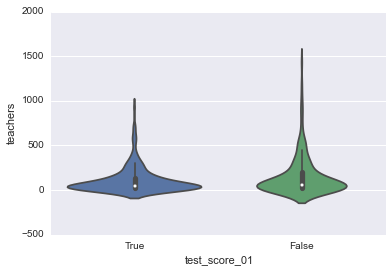

In [60]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.violinplot(x="test_score_01", y="teachers", data=df)

## 3

In [61]:
features = ['enrltot', 'teachers', 'calwpct', 'mealpct', 'computer', 'avginc']
X = df[features].values
y = df['test_score_01'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

## 4

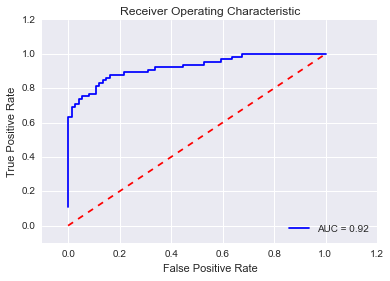

In [72]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import roc_curve, auc

def plot_roc(model):
    model.fit(X_train, y_train)
    predictions = model.predict_proba(X_test)
    predictions = [x[1] for x in predictions]
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, predictions)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    plt.title('Receiver Operating Characteristic')
    plt.plot(false_positive_rate, true_positive_rate, 'b',
    label='AUC = %0.2f'% roc_auc)
    plt.legend(loc='lower right')
    plt.plot([0,1],[0,1],'r--')
    plt.xlim([-0.1,1.2])
    plt.ylim([-0.1,1.2])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')

plot_roc(GaussianNB())

## 5

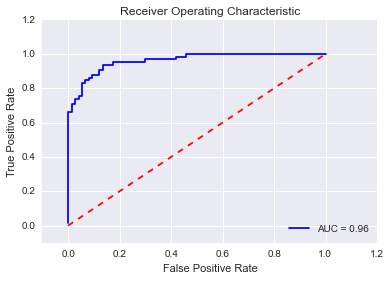

In [73]:
from sklearn.lda import LDA
plot_roc(LDA())

## 6

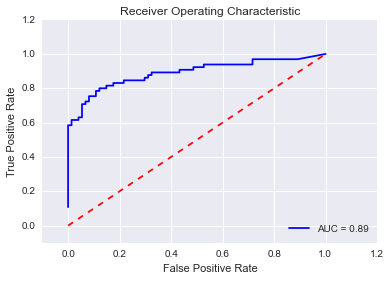

In [74]:
from sklearn.qda import QDA
plot_roc(QDA())

## 7

Naive bayes assumes a covariance matrix that is common to all K classes and that all variables are independent (zero values for off diagonal elements of covariance matrix)

LDA assumes a covariance matrix that is common to all K classes and allows for non-zero off diagonal elements (allows for variables to be dependent on eachother)

QDA assumes that each class has its own covariance matrix and that variables can be dependent.

See p.149 of introduction to statistical learning

# Question 4 (3+2+5=10 points) - Bayesian Network

In the Bayesian network shown below, B stands for `Battery', F for 'Fuel', G for 'Gauge', and S for 'Start'. Compute the following probabilities:

1. P(B = bad, F = not empty, G = empty, S = no)
2. P(B = good, F = empty, G = empty, S = no)
3. Given that the fuel is empty, compute the probability that the car will start.

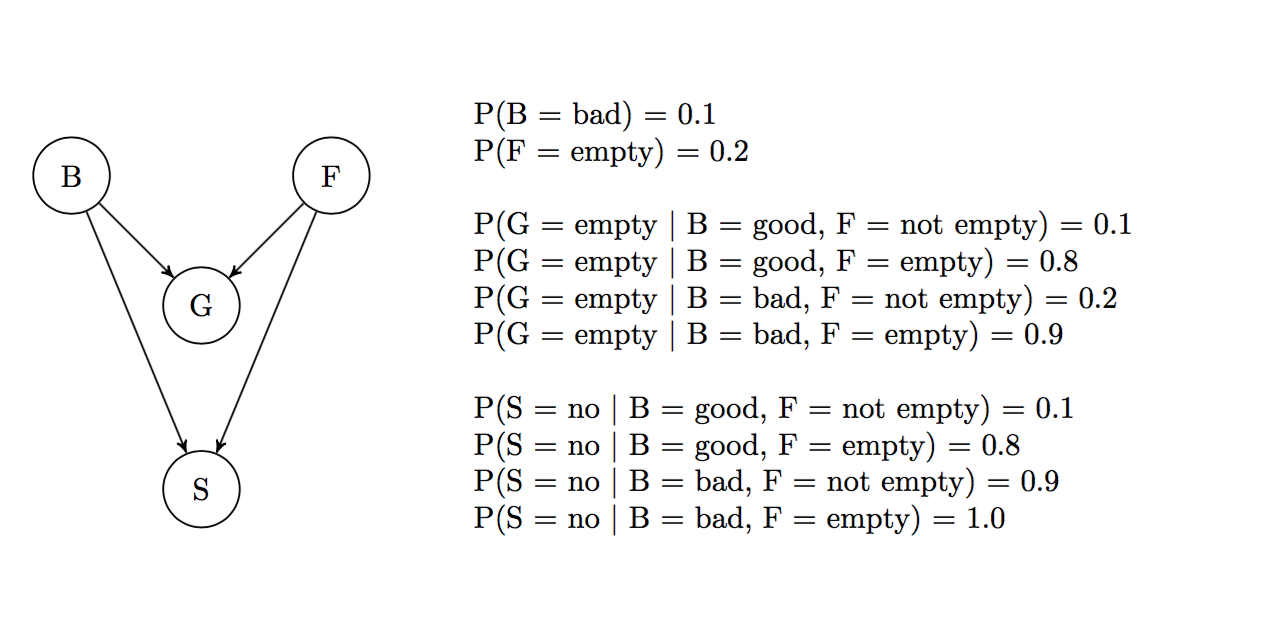

In [2]:
from IPython.display import Image
Image(filename='bbn.png') 

# ANSWER
1. p(B=bad) p(F=not empty) p(G=empty|B=bad, F=not empty) p(S=no|B=bad, F=not empty) = (.1) (1-.2) (.2) (.9) = .0144
1. p(B=good) p(F=empty) p(G=empty|B=good, F=empty) p(S=no|B=good, F=empty) = (1-.1) (.2) (.8) (.8) = .1152
1. P(S=yes|F=empty) = 1 - [P(S=no|F=empty)] = 1 - [P(S=no|B=good, F=empty) P(B=good) + P(S=no|B=bad, F=empty) P(B=bad)] = 1 - [(.8)(1-.1) + (1)(.1)] = 1 - [.72 + .1] = 1 - .82 = .18